<a href="https://colab.research.google.com/github/kruth-s/FDS-Lab/blob/main/Expt_4_Diagnostic_Analysis_1RVU23CSE227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Load Iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


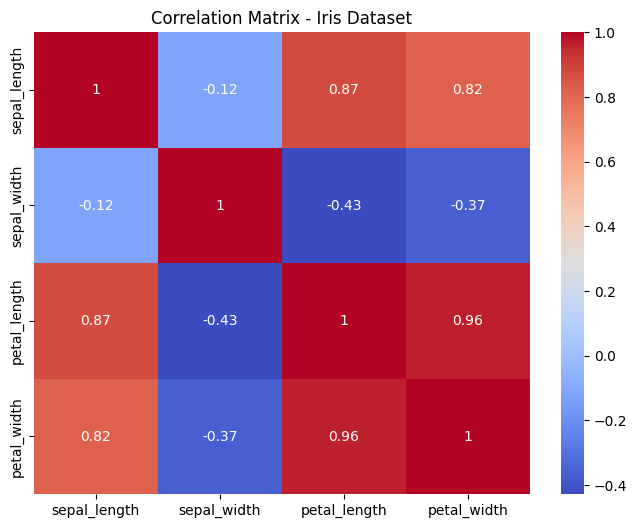

In [ ]:
# Select numeric columns only for correlation
numeric_iris = iris.select_dtypes(include=['number'])

print("Correlation Matrix:\n", numeric_iris.corr())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(numeric_iris.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Iris Dataset")
plt.show()



Species-wise Means:
             sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


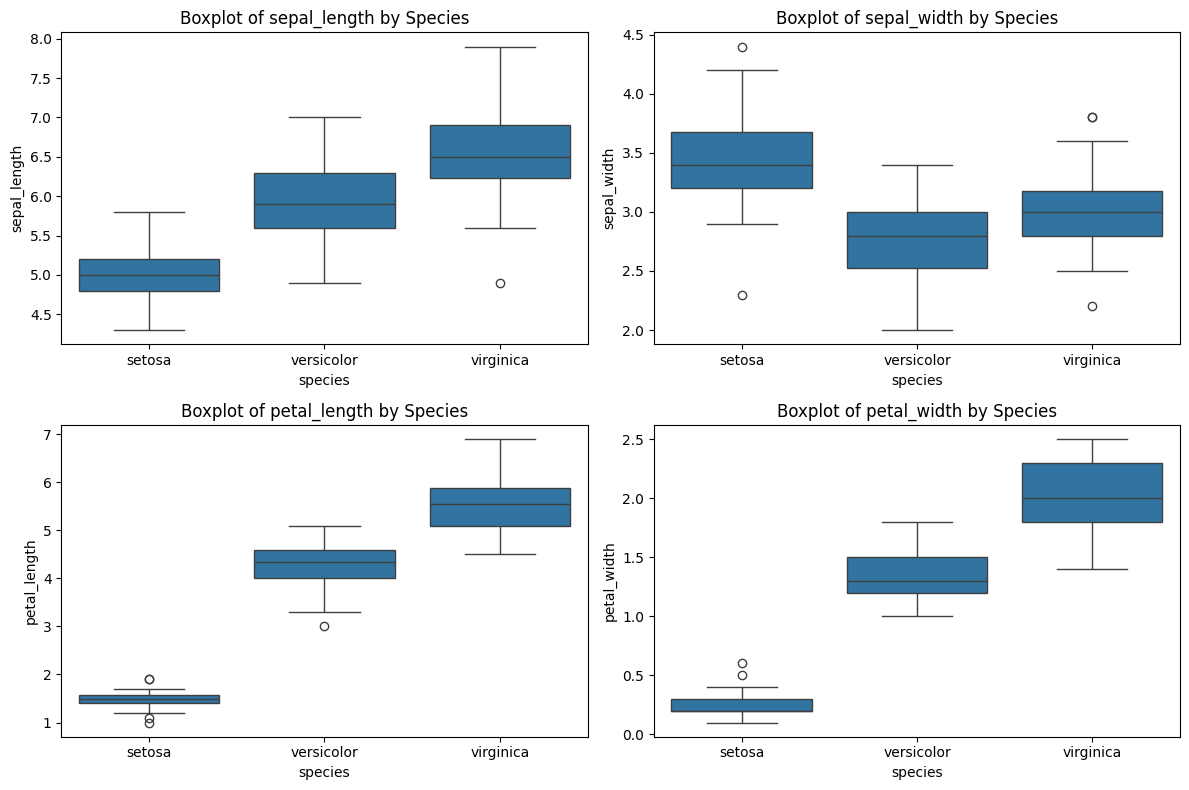

In [ ]:
# 2. Group Comparison - species-wise means and boxplots
species_means = iris.groupby('species').mean()
print("\nSpecies-wise Means:\n", species_means)

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_iris.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=col, data=iris)
    plt.title(f'Boxplot of {col} by Species')
plt.tight_layout()
plt.show()


Regression Coefficients:
Intercept: -7.101, Slope: 1.858
R^2 score: 0.760


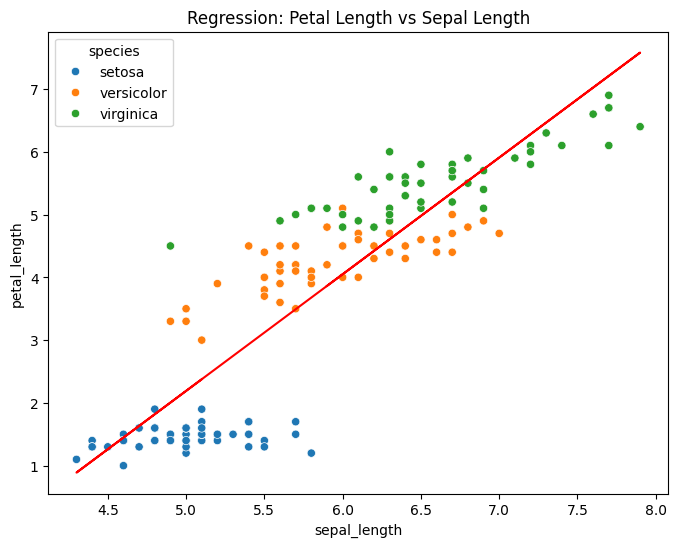

In [ ]:
# 3. Regression Analysis - Petal length as dependent on sepal length
X = iris[['sepal_length']]  # Predictor
y = iris['petal_length']    # Response

model = LinearRegression()
model.fit(X, y)

print(f"\nRegression Coefficients:\nIntercept: {model.intercept_:.3f}, Slope: {model.coef_[0]:.3f}")
print(f"R^2 score: {model.score(X, y):.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(X, model.predict(X), color='red')
plt.title('Regression: Petal Length vs Sepal Length')
plt.show()




Outliers based on Petal Length z-score > 2 or < -2:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species, petal_length_zscore]
Index: []


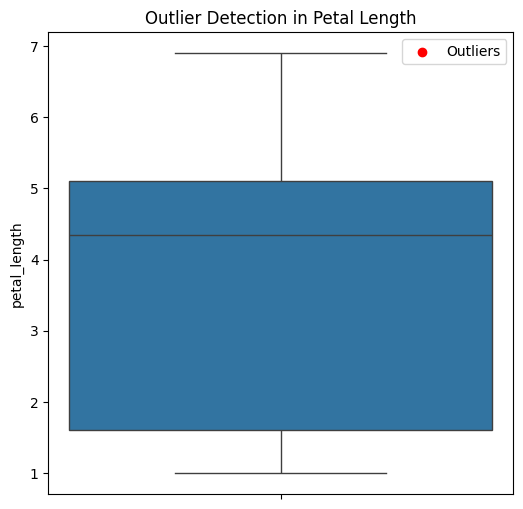

In [ ]:
from scipy.stats import zscore

# 4. Outlier Detection - using z-score for petal_length
iris['petal_length_zscore'] = zscore(iris['petal_length'])
outliers = iris[np.abs(iris['petal_length_zscore']) > 2]

print("\nOutliers based on Petal Length z-score > 2 or < -2:\n",
      outliers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'petal_length_zscore']])

plt.figure(figsize=(6, 6))
sns.boxplot(y='petal_length', data=iris)
plt.scatter(outliers.index, outliers['petal_length'], color='red', label='Outliers')
plt.title('Outlier Detection in Petal Length')
plt.legend()
plt.show()
